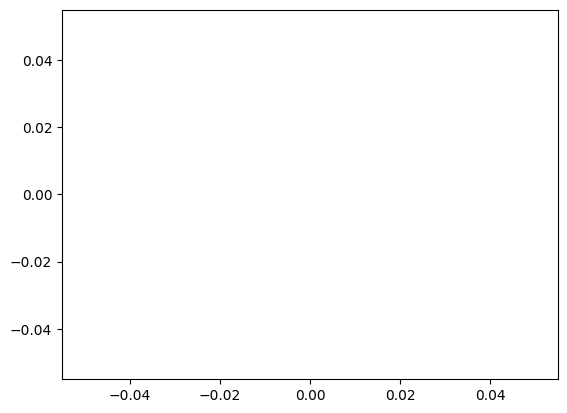

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

from utils import LeisureCB, WageChangeCB, WageChangeExp, WageChangeSate, Welfare, get_random_prob

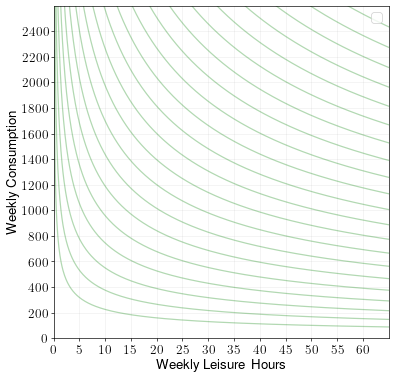

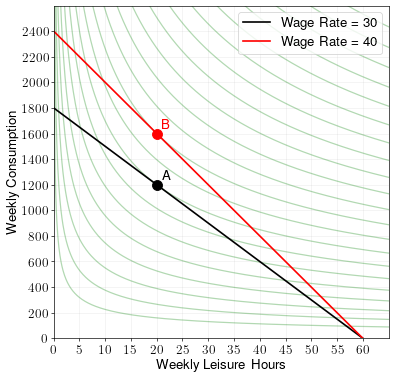

True

In [2]:
# Example 2: No change in hours worked
df = pd.read_csv("WageChangeCB_examples.csv")
mydf = df.loc[(df['w1']==30) & (df['w2']==40) & (df['cmax']==2400)].sample(1).reset_index(drop=True)
params = dict(mydf.loc[0])
prob = WageChangeCB(params)
prob.graph_with_IC(period1=False, period2=False, saveas='../assets/images/15-labor-leisure-example-2-setup.png', show=True)
prob.graph_with_IC(period1=True, period2=True, saveas='../assets/images/15-labor-leisure-example-2-solution.png', show=True)


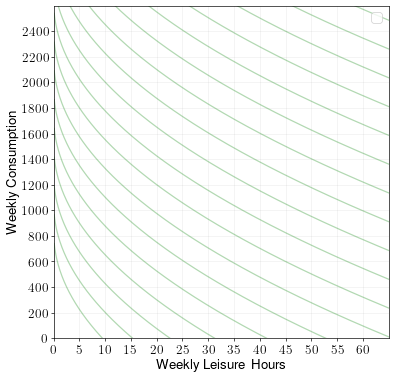

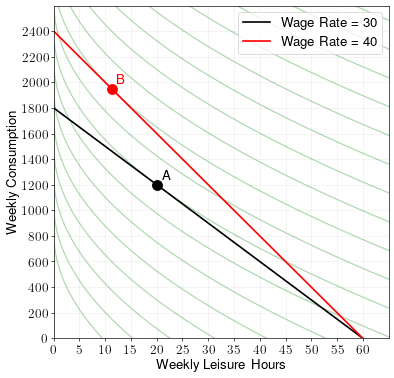

True

In [3]:
# Example 3: Increase in hours worked
df = pd.read_csv("WageChangeExp_examples.csv")
mydf = df.loc[(df['l1']>df['l2']) & (df['cmax']==2400) & (df['w1']==30) & (df['w2']==40) & (df['l1']==20)].reset_index(drop=True)
params = dict(mydf.loc[0])
prob = WageChangeExp(params)
prob.graph_with_IC(period1=False, period2=False, saveas='../assets/images/15-labor-leisure-example-3-setup.png', show=True)
prob.graph_with_IC(period1=True, period2=True, saveas='../assets/images/15-labor-leisure-example-3-solution.png', show=True)



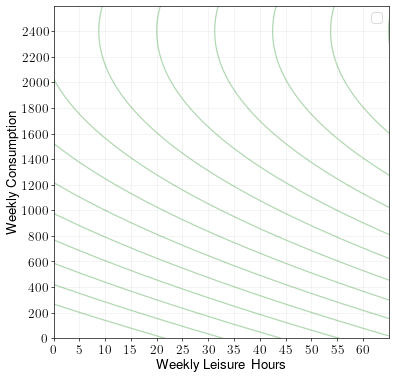

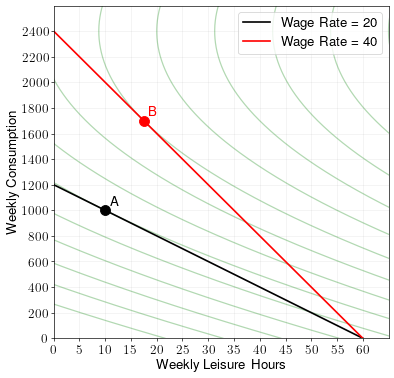

True

In [4]:
# Example 4: Decrease in hours worked
df = pd.read_csv("WageChangeSate_examples.csv")
mydf = df.loc[(df['l1']<df['l2']) & (df['cmax']==2400) & (df['w1']==20) & (df['w2']==40)].reset_index(drop=True)
params = dict(mydf.loc[0])
prob = WageChangeSate(params)
prob.graph_with_IC(period1=False, period2=False, saveas='../assets/images/15-labor-leisure-example-4-setup.png', show=True)
prob.graph_with_IC(period1=True, period2=True, saveas='../assets/images/15-labor-leisure-example-4-solution.png', show=True)



{'nx': 1.0, 'dx': 2.0, 'ny': 1.0, 'dy': 2.0, 'w': 15.0, 'cmax': 900.0, 'c': 525.0, 'l': 60.0, 'h': 0.0, 'U': 177.4823934929885, 'minc': 525.0, 'c_no_welfare': 450.0, 'h_no_welfare': 30.0, 'l_no_welfare': 30.0}
{'c': 525.0, 'l': 60, 'h': 0, 'U': 177.4823934929885, 'c_no_welfare': 450.0, 'h_no_welfare': 30.0, 'l_no_welfare': 30.0}


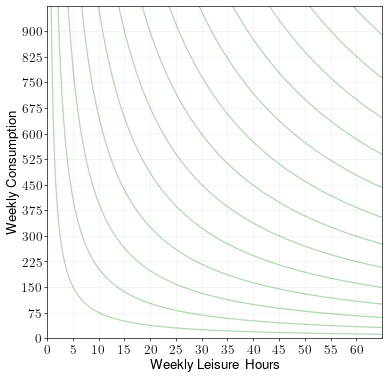

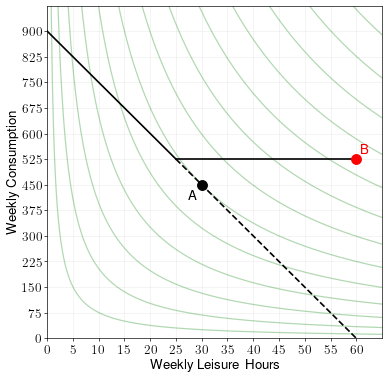

True

In [7]:
# Example 5: Welfare policy, reduce hours worked, increase consumption
df = pd.read_csv("Welfare_examples.csv")
mydf = df.loc[(df['c']>df['c_no_welfare']) & (df['w']==15)].reset_index(drop=True)
params = dict(mydf.loc[0])
prob = Welfare(params)
print(prob.params)
print(prob.sol)
prob.graph_with_IC(with_solution=False, saveas='../assets/images/15-labor-leisure-example-5-setup.png', show=True)
prob.graph_with_IC(with_solution=True, saveas='../assets/images/15-labor-leisure-example-5-solution.png', show=True)


{'nx': 1.0, 'dx': 2.0, 'ny': 1.0, 'dy': 2.0, 'w': 15.0, 'cmax': 900.0, 'c': 300.0, 'l': 60.0, 'h': 0.0, 'U': 134.1640786499874, 'minc': 300.0, 'c_no_welfare': 450.0, 'h_no_welfare': 30.0, 'l_no_welfare': 30.0}
{'c': 300.0, 'l': 60, 'h': 0, 'U': 134.1640786499874, 'c_no_welfare': 450.0, 'h_no_welfare': 30.0, 'l_no_welfare': 30.0}


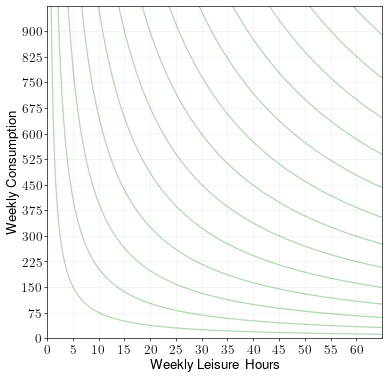

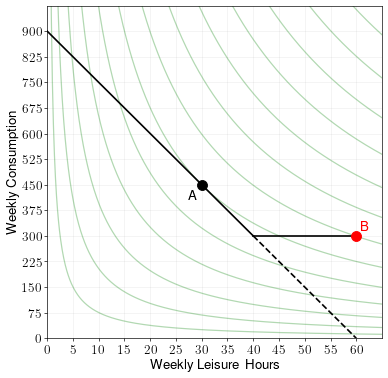

True

In [9]:
# Example 6: Welfare policy, reduce hours worked, reduce consumption
df = pd.read_csv("Welfare_examples.csv")
mydf = df.loc[(df['c']<df['c_no_welfare']) & (df['w']==15)].reset_index(drop=True)
params = dict(mydf.loc[0])
prob = Welfare(params)
print(prob.params)
print(prob.sol)
prob.graph_with_IC(with_solution=False, saveas='../assets/images/15-labor-leisure-example-6-setup.png', show=True)
prob.graph_with_IC(with_solution=True, saveas='../assets/images/15-labor-leisure-example-6-solution.png', show=True)


{'nx': 2.0, 'dx': 3.0, 'ny': 1.0, 'dy': 3.0, 'w': 15.0, 'cmax': 900.0, 'c': 600.0, 'l': 20.0, 'h': 40.0, 'U': 193.09787692112587, 'minc': 225.0, 'c_no_welfare': 600.0, 'h_no_welfare': 40.0, 'l_no_welfare': 20.0}
{'c': 600.0, 'l': 20.0, 'h': 40.0, 'U': 193.09787692112587, 'c_no_welfare': 600.0, 'h_no_welfare': 40.0, 'l_no_welfare': 20.0}


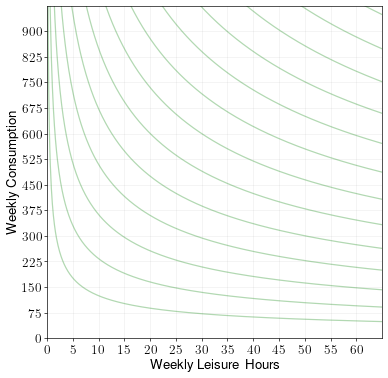

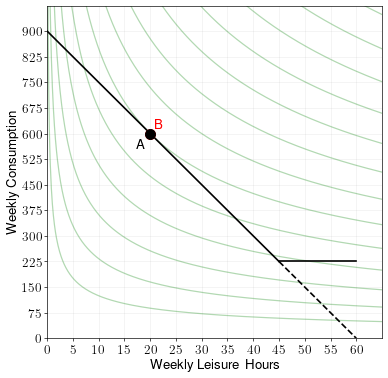

True

In [16]:
# Example 7: Welfare policy, no change
df = pd.read_csv("Welfare_examples.csv")
mydf = df.loc[(df['h']>0) & (df['w']==15) & (df['l_no_welfare']<=20) & (df['minc']>=df['cmax']*3/12)].reset_index(drop=True)
params = dict(mydf.loc[0])
prob = Welfare(params)
print(prob.params)
print(prob.sol)
prob.graph_with_IC(with_solution=False, saveas='../assets/images/15-labor-leisure-example-7-setup.png', show=True)
prob.graph_with_IC(with_solution=True, saveas='../assets/images/15-labor-leisure-example-7-solution.png', show=True)
